In [1]:
import pandas as pd

In [2]:
flight = pd.read_csv('Flights (Project Data).csv', low_memory=False)
print(flight.shape) 
print(flight.columns) 

(62006, 31)
Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


In [3]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62006 entries, 0 to 62005
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 62006 non-null  int64  
 1   MONTH                62006 non-null  int64  
 2   DAY                  62006 non-null  int64  
 3   DAY_OF_WEEK          62006 non-null  int64  
 4   AIRLINE              62006 non-null  object 
 5   FLIGHT_NUMBER        62006 non-null  int64  
 6   TAIL_NUMBER          61937 non-null  object 
 7   ORIGIN_AIRPORT       62006 non-null  object 
 8   DESTINATION_AIRPORT  62006 non-null  object 
 9   SCHEDULED_DEPARTURE  62006 non-null  int64  
 10  DEPARTURE_TIME       60573 non-null  float64
 11  DEPARTURE_DELAY      60573 non-null  float64
 12  TAXI_OUT             60543 non-null  float64
 13  WHEELS_OFF           60543 non-null  float64
 14  SCHEDULED_TIME       62005 non-null  float64
 15  ELAPSED_TIME         60398 non-null 

In [4]:
df = flight[0:100000]

In [5]:
df.head()


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.value_counts('DIVERTED')

DIVERTED
0.0    61872
1.0      133
dtype: int64

In [7]:
import plotly.express as px
fig = px.scatter(df, x='SCHEDULED_ARRIVAL', y='ARRIVAL_TIME', color='ARRIVAL_DELAY')
fig.show()

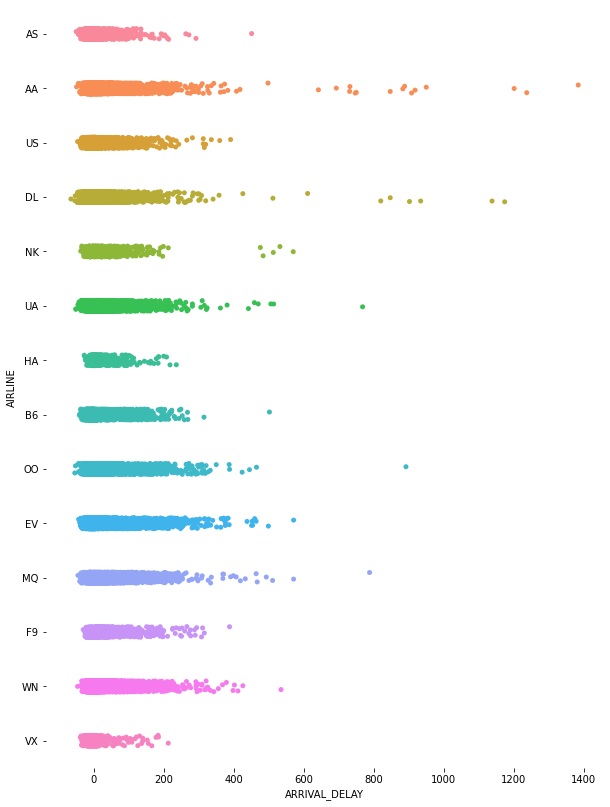

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE", data = flight, dodge=True, jitter=True)
plt.show()

In [9]:
# filtering out unnecessary columns for ML
df=df.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',
                                              'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                              'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'],
                                             axis=1)

In [10]:
df=df.fillna(df.mean()) # filling 0 or nan values with mean

<ipython-input-10-b8ce3a597490>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [11]:
#0 flight not delayed 1 flight is delayed
result=[]
for row in df['ARRIVAL_DELAY']:
    if row > 15:
        result.append(1)
    else:
        result.append(0)  

In [12]:
df['result'] = result

In [13]:
df.head

<bound method NDFrame.head of        MONTH  DAY ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0          1    1            ANC                 SEA                    5   
1          1    1            LAX                 PBI                   10   
2          1    1            SFO                 CLT                   20   
3          1    1            LAX                 MIA                   20   
4          1    1            SEA                 ANC                   25   
...      ...  ...            ...                 ...                  ...   
62001      1    4            SLC                 FCA                 2155   
62002      1    4            MSP                 RAP                 2155   
62003      1    4            DEN                 GTF                 2155   
62004      1    4            SLC                 EKO                 2155   
62005      1    4            ATL                 BNA                 2156   

       DEPARTURE_DELAY  SCHEDULED_ARRIVAL  AR

In [14]:
df.value_counts('result') #1 is delayed we getting count how many delayed

result
0    39105
1    22901
dtype: int64

In [15]:
# removing some more columns
df=df.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
df.head

<bound method NDFrame.head of        MONTH  DAY  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_ARRIVAL  \
0          1    1                    5       -11.000000         430.000000   
1          1    1                   10        -8.000000         750.000000   
2          1    1                   20        -2.000000         806.000000   
3          1    1                   20        -5.000000         805.000000   
4          1    1                   25        -1.000000         320.000000   
...      ...  ...                  ...              ...                ...   
62001      1    4                 2155         5.000000        2353.000000   
62002      1    4                 2155        19.902646        2247.000000   
62003      1    4                 2155        47.000000        2355.000000   
62004      1    4                 2155        -2.000000        2206.000000   
62005      1    4                 2156        27.000000        1514.336666   

       DIVERTED  CANCELLED  AIR_S

In [16]:
##ML starts here 
from sklearn.model_selection import train_test_split

data = df.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)  # splitting in the ratio 70:30

# Random Forest Classifier

In [17]:
#-----------------------------------------RANDOMFOREST----------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [18]:
clf = RandomForestClassifier(n_estimators=30, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

0.9958606601440705
1.0


In [19]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('Model accuracy for RF', accuracy_score(y_test,y_pred))

[[11711    62]
 [   15  6814]]
Model accuracy for RF 0.9958606601440705


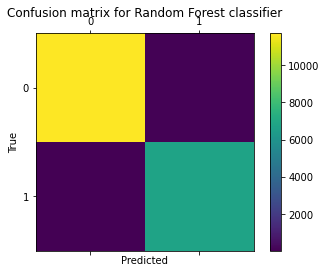

In [20]:
import matplotlib.pyplot as plt

fig_1 = plt.figure()
ax = fig_1.add_subplot(111)
cax = ax.matshow(confusion_matrix(y_test,y_pred))
plt.title('Confusion matrix for Random Forest classifier')
fig_1.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [21]:
'''The macro average is the arithmetic mean of the individual class related to precision,
memory, and f1 score. We use macro average scores when we need to treat all classes equally
to evaluate the overall performance of the classifier against the most common class labels.'''

print("F1 score :",f1_score(y_test, y_pred, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred, average="macro"))  

F1 score : 0.9955524386849719
Precision Score : 0.9948519605651518
Recall Score : 0.9962685989347198


# KNN CLASSIFIER

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier()

Knn_param = {'n_neighbors': range(3, 30, 2)}

Knn_grid = GridSearchCV(Knn, Knn_param, cv = 10)
Knn_grid.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 30, 2)})

In [23]:
print("Value of chosen K: ", Knn_grid.best_params_)
print("Mean Validation accuracy for chosen K: ", Knn_grid.best_score_)
print("Test Accuracy for the best K : ", Knn_grid.best_estimator_.score(X_test,y_test))

Value of chosen K:  {'n_neighbors': 3}
Mean Validation accuracy for chosen K:  0.9521240885055897
Test Accuracy for the best K :  0.9560799913987743


In [24]:
objClassifier = KNeighborsClassifier(n_neighbors = 3,  metric ='minkowski', p=2)
objClassifier.fit(X_train_sc,y_train)
objClassifier


KNeighborsClassifier(n_neighbors=3)

In [25]:
y_pred1=objClassifier.predict(X_test_sc)
#Making the confussion matarix 
print(confusion_matrix(y_test,y_pred1))
print('Model accuracy for KNNC', accuracy_score(y_test,y_pred1))

[[11619   154]
 [   74  6755]]
Model accuracy for KNNC 0.9877432534136115


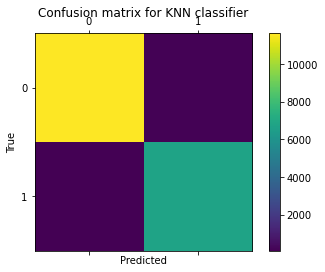

In [26]:
import matplotlib.pyplot as plt

fig_2 = plt.figure()
ax = fig_2.add_subplot(111)
cax = ax.matshow(confusion_matrix(y_test,y_pred1))
plt.title('Confusion matrix for KNN classifier')
fig_2.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [27]:
print("F1 score :",f1_score(y_test, y_pred1, average="macro"))
print("Precision Score :" , precision_score(y_test, y_pred1, average="macro"))
print("Recall Score :" , recall_score(y_test, y_pred1, average="macro"))

F1 score : 0.9868437563268531
Precision Score : 0.9856908301895392
Recall Score : 0.9880415409786563


# Decision Tree Classifier

In [28]:
#------------------------------------DECISIONTREE-------------------------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier
scaled_features = StandardScaler().fit_transform(X_train, X_test)

**Pre-pruning**

-Before building the tree we will optimize it to avoid overfitting.

In [50]:
dct_clf = DecisionTreeClassifier(max_depth= 5,random_state=0)
dct_clf = dct_clf.fit(X_train,y_train)
print(dct_clf.score(X_test, y_test))
print(dct_clf.score(X_train, y_train))
#The difference is train and test accuracy indicates a chance of overfitting.
#Let us visualize the tree and calculate other performance measures.

0.9918288356090743
0.9920514238319049


In [51]:
# Predicting the Test set results
y_pred2 = dct_clf.predict(X_test)# Making the Confusion Matrix
print(confusion_matrix(y_test, y_pred2))
print('Model accuracy for DCT', accuracy_score(y_test,y_pred2)) #DCT accuracy

[[11629   144]
 [    8  6821]]
Model accuracy for DCT 0.9918288356090743


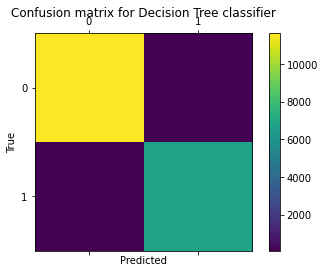

In [52]:
import matplotlib.pyplot as plt

fig_3 = plt.figure()
ax = fig_3.add_subplot(111)
cax = ax.matshow(confusion_matrix(y_test,y_pred1))
plt.title('Confusion matrix for Decision Tree classifier')
fig_3.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [53]:
print("F1 score for DCT:",f1_score(y_test, y_pred2, average='macro'))
print("Precision Score fro DCT:" , precision_score(y_test, y_pred2, average='macro'))
print("Recall Score for DCT:" , recall_score(y_test, y_pred2, average="macro"))

F1 score for DCT: 0.9912438822617068
Precision Score fro DCT: 0.989318867505625
Recall Score for DCT: 0.9932985742635276


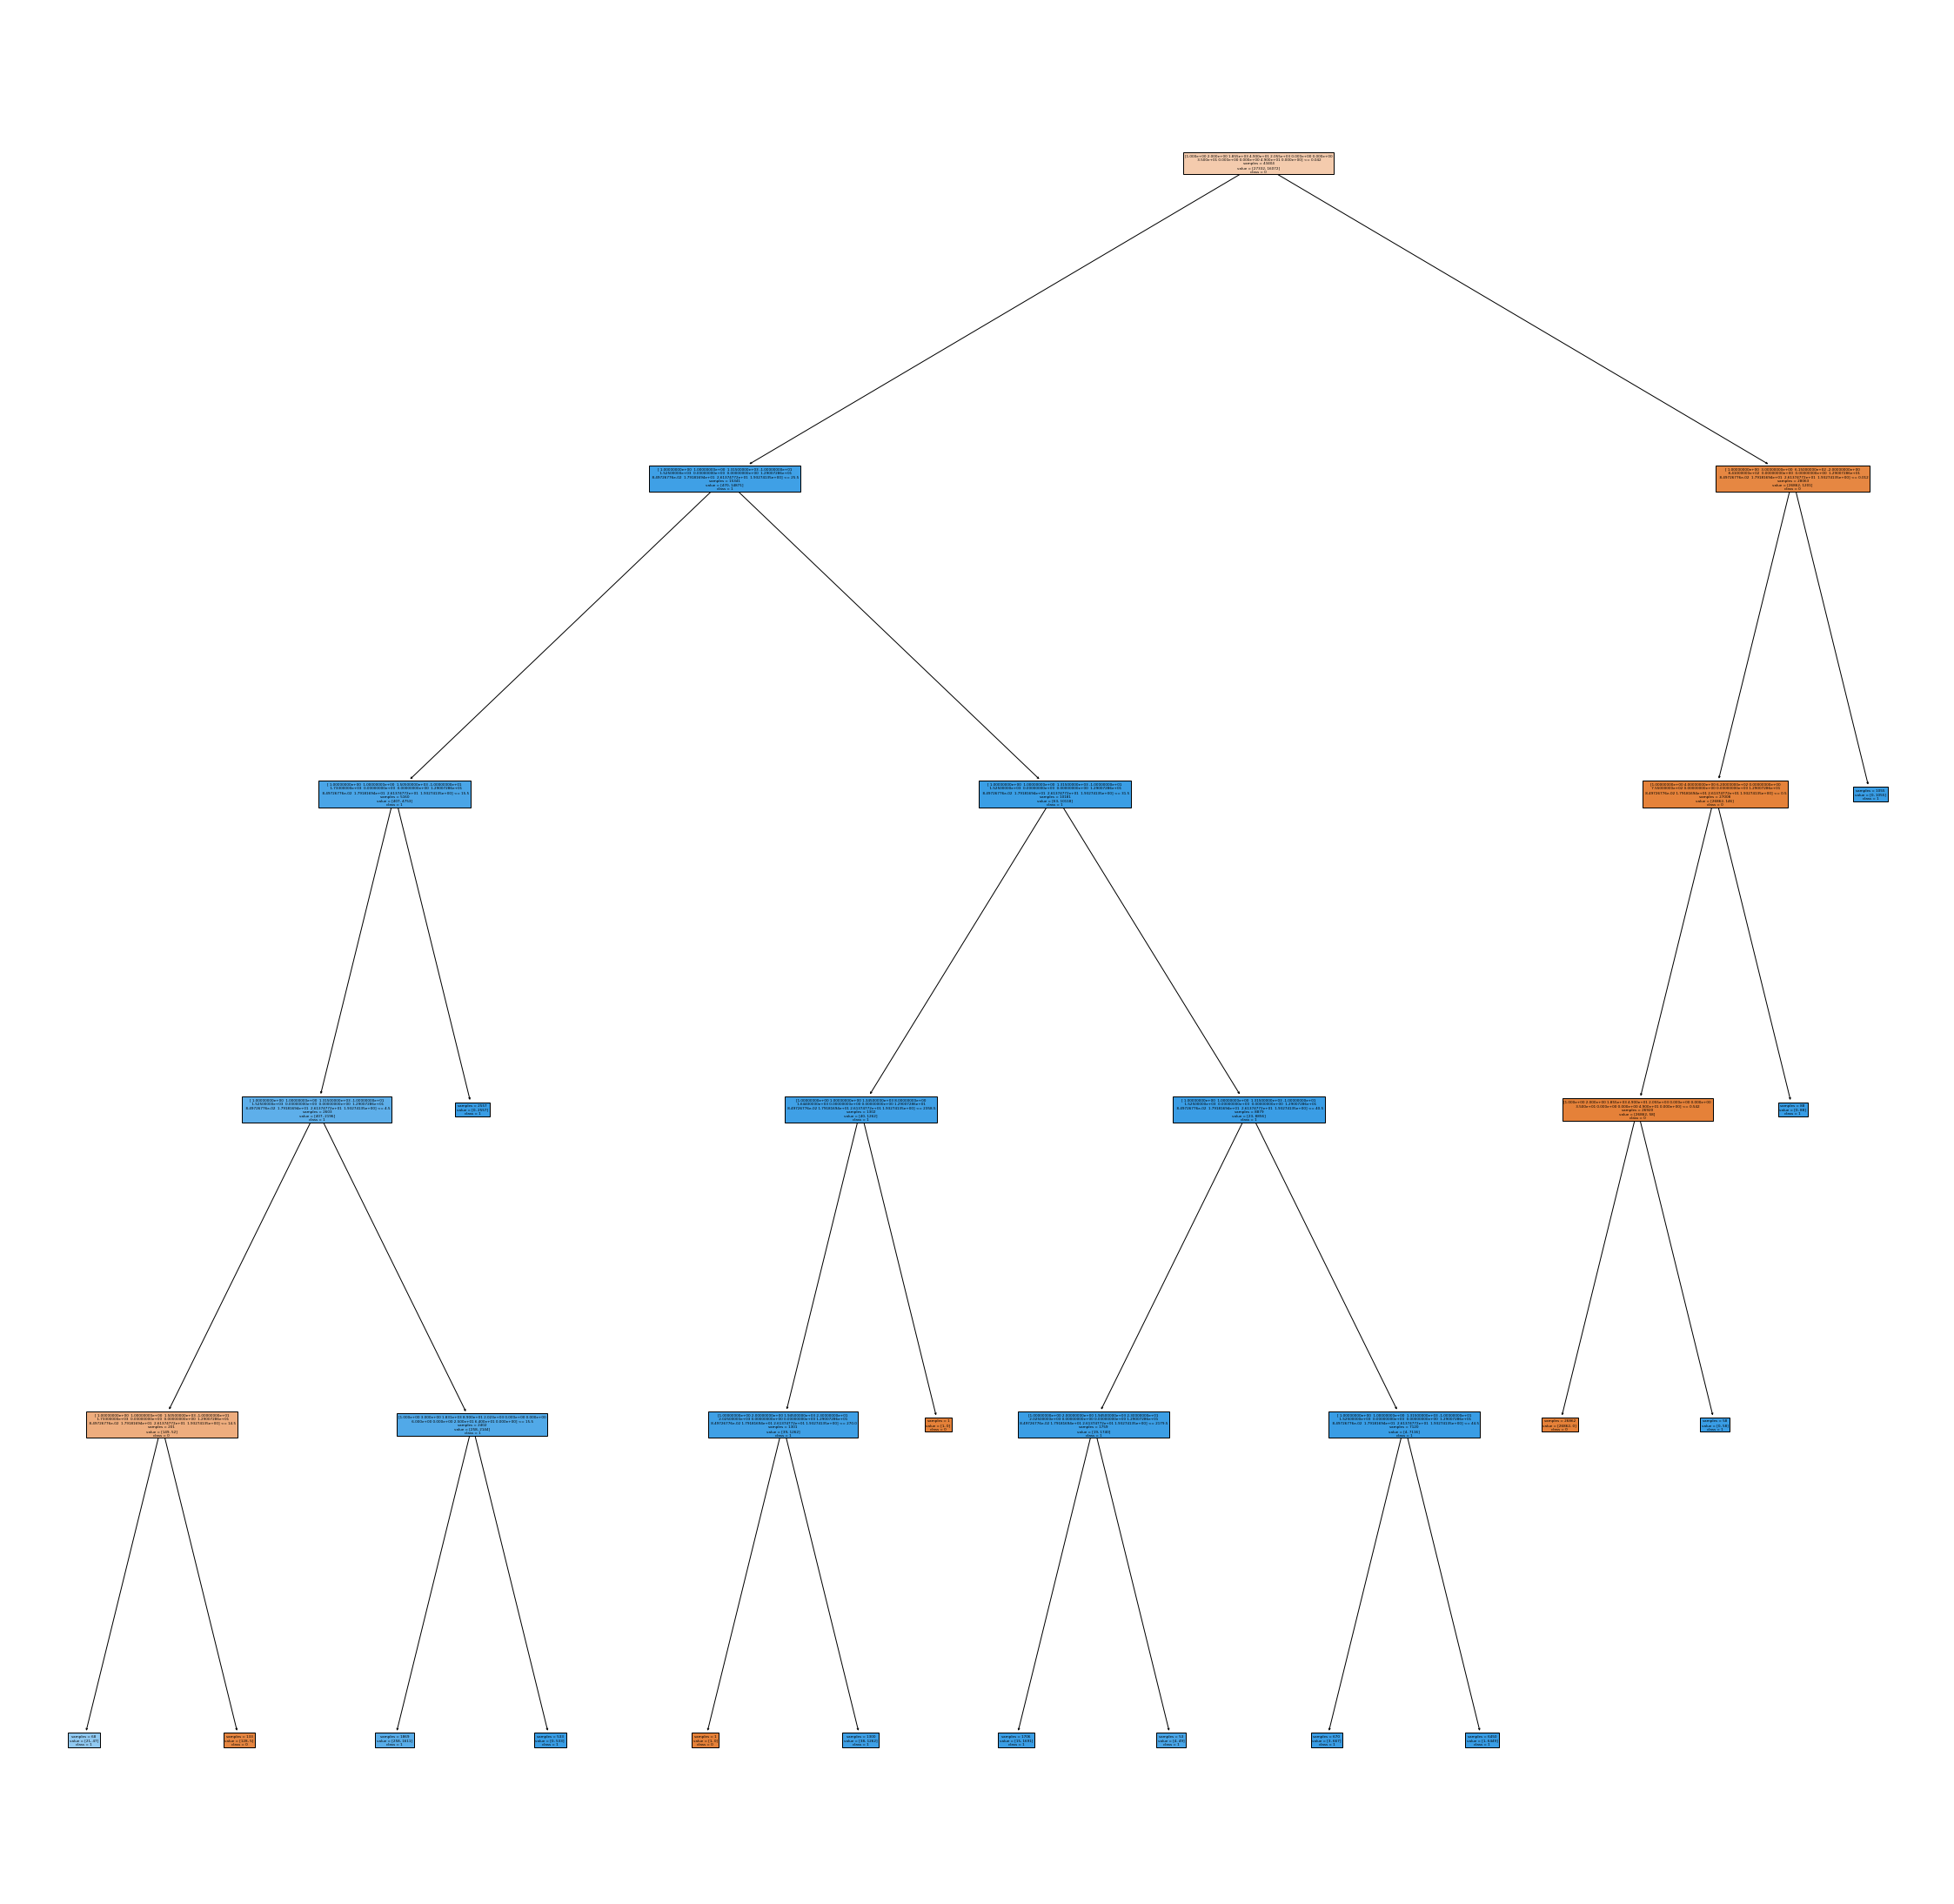

In [54]:
# Plot the decision tree

from sklearn import tree
fig = plt.figure(figsize=(40,40)) # set a proper figure size (in case that the figure is too small to read or ratio is not proper)

tree.plot_tree(dct_clf, 
               feature_names = X_train, # specify variable names 
               class_names = ['0','1'], # specify class (Y) names
               filled = True, impurity = False) # whether to color the boxes, whether to report gini index
             #   fontsize = 12) # set fontsize to read
plt.show()


#Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

Guassian_NB = GaussianNB()
Gaussian_NB = Guassian_NB.fit(X_train, y_train)

print('Testing accuracy for Gaussain Niave Bayes:', Guassian_NB.score(X_test, y_test))
print('Training accuracy for Gaussain Niave Bayes:', Guassian_NB.score(X_train, y_train))

gnb_pred = Gaussian_NB.predict(X_test)
print(confusion_matrix(y_test, gnb_pred))
print('Model accuracy for GNB', accuracy_score(y_test,gnb_pred)) #GNB accuracy

print("F1 score for GNB:",f1_score(y_test, gnb_pred, average='macro'))
print("Precision Score fro GNB:" , precision_score(y_test, gnb_pred, average='macro'))
print("Recall Score for GNB:" , recall_score(y_test, gnb_pred, average="macro"))

Testing accuracy for Gaussain Niave Bayes: 0.9894097408880765
Training accuracy for Gaussain Niave Bayes: 0.9891484655792093
[[11576   197]
 [    0  6829]]
Model accuracy for GNB 0.9894097408880765
F1 score for GNB: 0.9886720571083074
Precision Score fro GNB: 0.9859806433247936
Recall Score for GNB: 0.9916333984540899
